In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [68]:
news_data = pd.read_table('./data/news_data.tsv', delimiter='\t')

In [69]:
news_data

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10235,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10236,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10237,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [70]:
# Drop unnecessary columns
news_data.drop(columns=['2635.json', 'abortion', 'dwayne-bohac', 'State representative', 'Texas', 'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'], inplace=True)

In [71]:
news_data.head()

,false,Says the Annies List political group supports third-trimester abortions on demand.
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...


In [72]:
news_data.columns = ['label', 'news_text']

In [73]:
news_data.shape

(10239, 2)

In [74]:
# checking null values
news_data.isnull().sum()

label        0
news_text    0
dtype: int64

In [75]:
# Count of each label
each_label_count = news_data['label'].value_counts()

In [76]:
each_label_count

label
half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

In [77]:
#creating a balanced dataset of 204 dataponts in total
# filtering out each label
news_data_half_true_only = news_data[news_data['label'] == 'half-true']
news_data_false_only = news_data[news_data['label'] == 'false']
news_data_mostly_true_only = news_data[news_data['label'] == 'mostly-true']
news_data_true_only = news_data[news_data['label'] == 'true']
news_data_barely_true_only = news_data[news_data['label'] == 'barely-true']
news_data_pants_fire_only = news_data[news_data['label'] == 'pants-fire']

In [78]:
# sampling 34 datapoints from each label
news_data_half_true_only_sample = news_data_half_true_only[0:34]
news_data_false_only_sample = news_data_false_only[0:34]
news_data_mostly_true_only_sample = news_data_mostly_true_only[0:34]
news_data_true_only_sample = news_data_true_only[0:34]
news_data_barely_true_only_sample = news_data_barely_true_only[0:34]
news_data_pants_fire_only_sample = news_data_pants_fire_only[0:34]

In [79]:
# combining all the sampled data
new_news_dataset = pd.concat([news_data_half_true_only_sample, news_data_false_only_sample, news_data_mostly_true_only_sample, news_data_true_only_sample, news_data_barely_true_only_sample, news_data_pants_fire_only_sample], axis=0)

In [80]:
new_news_dataset.head()

,label,news_text
0,half-true,When did the decline of coal start? It started...
3,half-true,The economic turnaround started at the end of ...
6,half-true,I'm the only person on this stage who has work...
7,half-true,"However, it took $19.5 million in Oregon Lotte..."
10,half-true,"Since 2000, nearly 12 million Americans have s..."


In [81]:
new_news_dataset.shape

(204, 2)

In [82]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nahal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nahal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
ps = PorterStemmer()

In [85]:
def preprocess_text(text):

  text = text.lower() 

  text = nltk.word_tokenize(text)

  word_arr = []

  for i in text:
    if i.isalnum():
      word_arr.append(i)

  text = word_arr[:]

  word_arr.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      word_arr.append(i)

  text = word_arr[:]

  word_arr.clear()

  for i in text:
    word_arr.append(ps.stem(i))

  return " ".join(word_arr)

In [86]:
# Creating a new column in the dataset and inserting all the pre-proccessed texts inside it
new_news_dataset['preprocessed_news_text'] = new_news_dataset['news_text'].apply(preprocess_text)

In [87]:
new_news_dataset.head()

,label,news_text,preprocessed_news_text
0,half-true,When did the decline of coal start? It started...,declin coal start start natur ga took start be...
3,half-true,The economic turnaround started at the end of ...,econom turnaround start end term
6,half-true,I'm the only person on this stage who has work...,person stage work activ last year pass along r...
7,half-true,"However, it took $19.5 million in Oregon Lotte...",howev took million oregon lotteri fund port ne...
10,half-true,"Since 2000, nearly 12 million Americans have s...",sinc 2000 nearli 12 million american slip midd...


In [88]:
new_news_dataset.drop(columns=['news_text', 'label'], inplace=True)

In [89]:
new_news_dataset.head()

,preprocessed_news_text
0,declin coal start start natur ga took start be...
3,econom turnaround start end term
6,person stage work activ last year pass along r...
7,howev took million oregon lotteri fund port ne...
10,sinc 2000 nearli 12 million american slip midd...


In [90]:
# vectorizing the pre-processed texts using TF-IDF
vectorizer = TfidfVectorizer()

In [91]:
X = vectorizer.fit_transform(new_news_dataset['preprocessed_news_text']).toarray()

In [92]:
# applying PCA to reduce the dimensionality of the data to 2D for visualization
pca = PCA(n_components=2, random_state=42)

In [93]:
X = pca.fit_transform(X)

In [94]:
#implementing K-Means clustering and finding the optimal number of clusters
wcss = []

for i in range(1, 11):

  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

In [95]:
wcss

[5.213262416759251,
 3.5428022879039194,
 2.0402291035705926,
 1.561084035474701,
 1.2682673404133296,
 1.115642081961194,
 0.8855089790219604,
 0.8397967489501584,
 0.7029418274839278,
 0.6541924685308979]

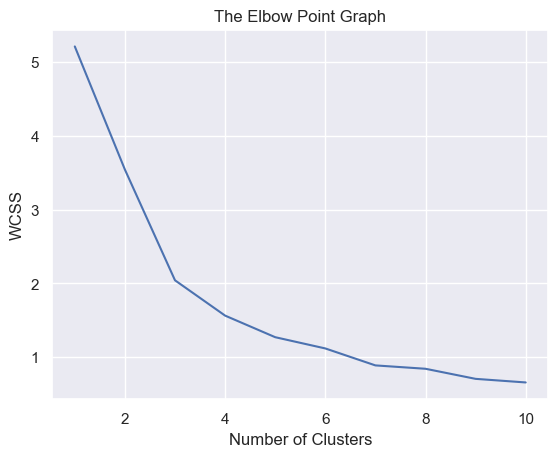

In [96]:
# plotting the elbow graph
sns.set()

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [97]:
#Training the K-Means model with the optimal number of clusters (6)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

In [98]:
kmeans.fit_predict(X)

array([5, 4, 1, 4, 1, 0, 0, 2, 4, 2, 0, 4, 0, 1, 4, 4, 5, 5, 3, 5, 4, 0,
       4, 2, 3, 2, 5, 4, 4, 5, 5, 3, 1, 5, 2, 4, 4, 4, 2, 5, 2, 4, 5, 2,
       5, 0, 4, 2, 2, 2, 1, 4, 1, 4, 4, 2, 1, 5, 4, 4, 1, 3, 2, 4, 4, 1,
       4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 0, 0, 0, 0, 4, 1, 4, 1, 2, 2, 4, 4,
       4, 5, 1, 4, 1, 5, 4, 1, 0, 2, 1, 4, 1, 4, 1, 4, 2, 4, 1, 1, 5, 4,
       3, 4, 5, 5, 0, 2, 4, 4, 1, 1, 0, 4, 3, 2, 4, 2, 4, 4, 4, 1, 1, 2,
       4, 0, 4, 2, 1, 4, 4, 2, 1, 2, 1, 4, 4, 4, 4, 3, 2, 1, 5, 2, 1, 3,
       4, 0, 2, 2, 4, 3, 5, 2, 0, 1, 2, 4, 4, 5, 2, 2, 4, 4, 2, 4, 5, 4,
       3, 2, 5, 5, 5, 4, 4, 2, 4, 2, 4, 5, 4, 1, 4, 1, 1, 4, 2, 4, 0, 4,
       4, 4, 4, 4, 4, 4], dtype=int32)

In [99]:
kmeans_labels = kmeans.labels_

In [100]:
kmeans_labels

array([5, 4, 1, 4, 1, 0, 0, 2, 4, 2, 0, 4, 0, 1, 4, 4, 5, 5, 3, 5, 4, 0,
       4, 2, 3, 2, 5, 4, 4, 5, 5, 3, 1, 5, 2, 4, 4, 4, 2, 5, 2, 4, 5, 2,
       5, 0, 4, 2, 2, 2, 1, 4, 1, 4, 4, 2, 1, 5, 4, 4, 1, 3, 2, 4, 4, 1,
       4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 0, 0, 0, 0, 4, 1, 4, 1, 2, 2, 4, 4,
       4, 5, 1, 4, 1, 5, 4, 1, 0, 2, 1, 4, 1, 4, 1, 4, 2, 4, 1, 1, 5, 4,
       3, 4, 5, 5, 0, 2, 4, 4, 1, 1, 0, 4, 3, 2, 4, 2, 4, 4, 4, 1, 1, 2,
       4, 0, 4, 2, 1, 4, 4, 2, 1, 2, 1, 4, 4, 4, 4, 3, 2, 1, 5, 2, 1, 3,
       4, 0, 2, 2, 4, 3, 5, 2, 0, 1, 2, 4, 4, 5, 2, 2, 4, 4, 2, 4, 5, 4,
       3, 2, 5, 5, 5, 4, 4, 2, 4, 2, 4, 5, 4, 1, 4, 1, 1, 4, 2, 4, 0, 4,
       4, 4, 4, 4, 4, 4], dtype=int32)

Text(0.5, 1.0, 'Kmeans Clustering')

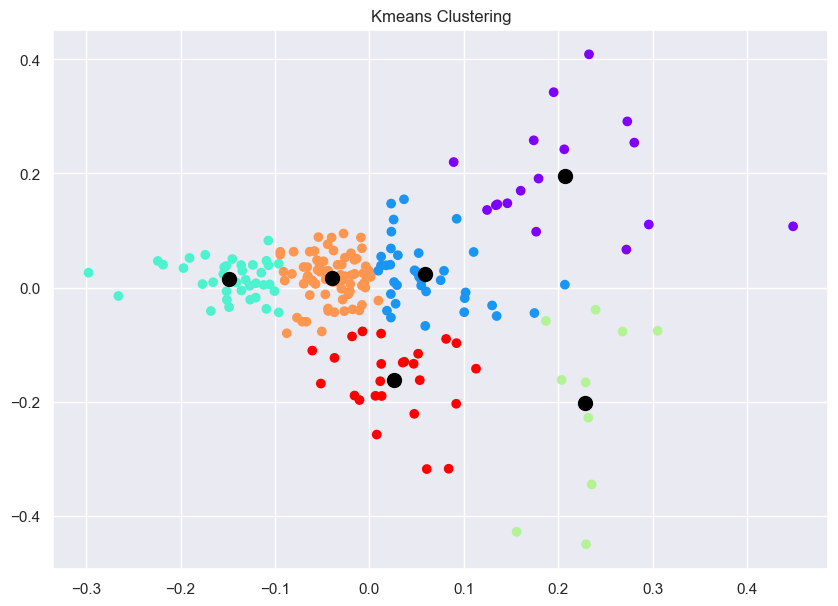

In [101]:
#plotting the clustered data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroid')
plt.title('Kmeans Clustering')

In [102]:
#checking the quality of the clusters using silhouette score
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)

In [103]:
silhouette_score_kmeans

0.3581314162021928

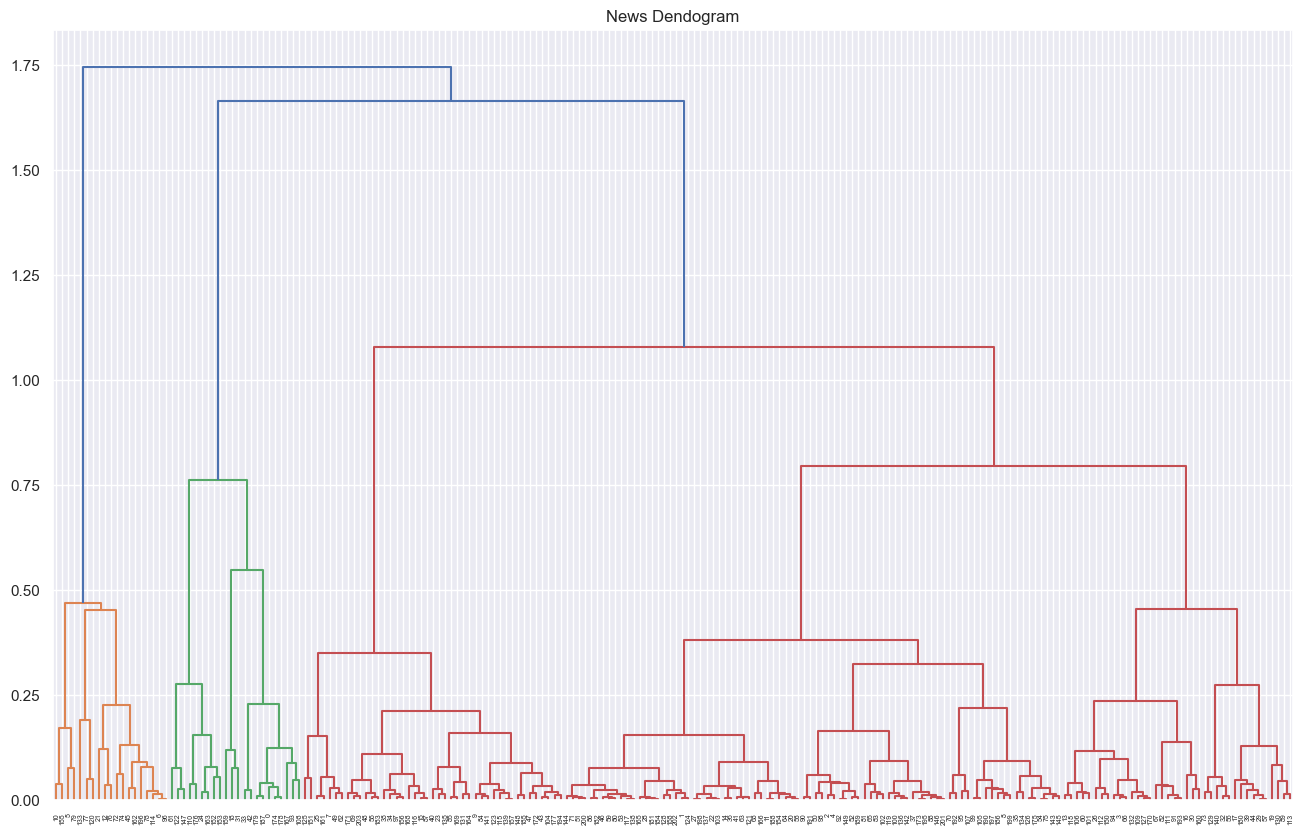

In [104]:
# Implementing Agglomerative Hierarical Clustering Algorithm and finding the optimal number of clusters using Dendogram
plt.figure(figsize=(16, 10))

plt.title('News Dendogram')

dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [105]:
# Training the Agglomerative Hierarical Clustering model with the optimal number of clusters (3)
cluster_hierarcial = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [106]:
cluster_hierarcial.fit_predict(X)

array([2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [107]:
hiearachy_labels = cluster_hierarcial.labels_

Text(0.5, 1.0, 'Agglomerative Hierarical Clustering')

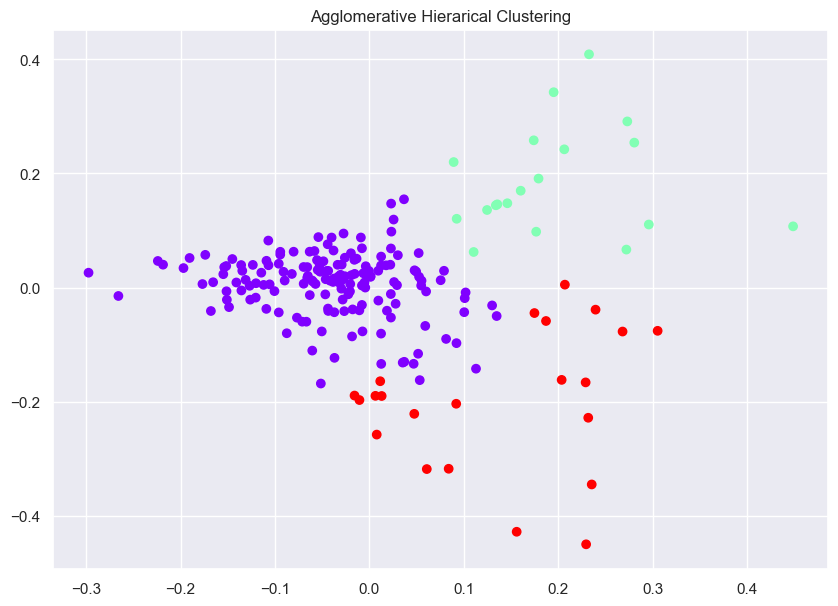

In [108]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=hiearachy_labels, cmap='rainbow')
plt.title('Agglomerative Hierarical Clustering')

In [109]:
silhouette_score_hierarchy = silhouette_score(X, hiearachy_labels)

In [110]:
silhouette_score_hierarchy

0.5236998723248718

In [111]:
# Comparing the silhouette scores of both the algorithms
silhoutte_score_df = pd.DataFrame({
    'Algorithm': ['k-means Clustering',  'Agglomerative Hierarical Clustering'],
    'Silhouette Score': [silhouette_score_kmeans, silhouette_score_hierarchy]
})

In [112]:
silhoutte_score_df

,Algorithm,Silhouette Score
0,k-means Clustering,0.358131
1,Agglomerative Hierarical Clustering,0.523700


Text(0.5, 1.0, 'Silhouette Score of each Algorithm')

<Figure size 1200x800 with 0 Axes>

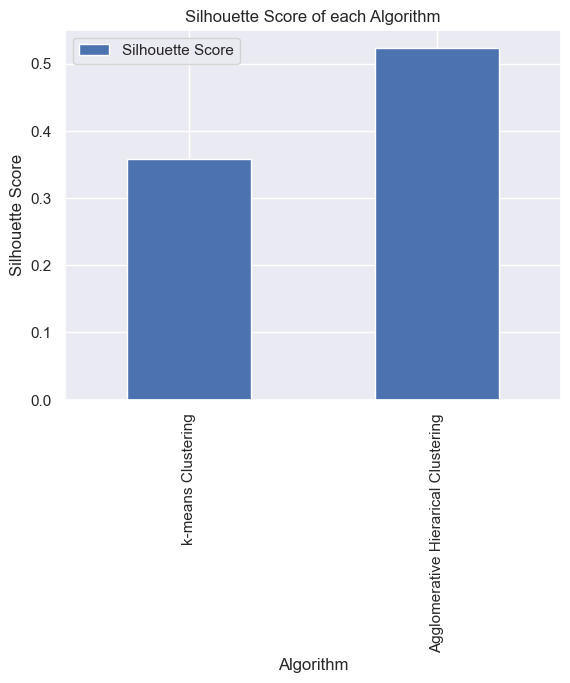

In [113]:
plt.figure(figsize=(12, 8))

silhoutte_score_df.plot(kind='bar', x='Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score of each Algorithm')

In [114]:
# Testing the models with some sample data
sample_data_true = 'The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.'
sample_data_false = 'Health care reform legislation is likely to mandate free sex change surgeries.'
sample_data_half_true = 'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'
sample_data_mostly_true = 'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."'
sample_data_barely_true = 'Jim Dunnam has not lived in the district he represents for years now.'
sample_data_pants_fire = 'In the case of a catastrophic event, the Atlanta-area offices of the Centers for Disease Control and Prevention will self-destruct.'

In [115]:
# pre-proccessing the sample data
sample_data_true_preproccessed = preprocess_text(sample_data_true)
sample_data_false_preproccessed = preprocess_text(sample_data_false)
sample_data_half_true_preproccessed = preprocess_text(sample_data_half_true)
sample_data_mostly_true_preproccessed = preprocess_text(sample_data_mostly_true)
sample_data_barely_true_preproccessed = preprocess_text(sample_data_barely_true)
sample_data_pants_fire_preproccessed = preprocess_text(sample_data_pants_fire)

In [116]:
# vectorizing the sample data
sample_data_true_vectorized = vectorizer.transform([sample_data_true_preproccessed]).toarray()
sample_data_false_vectorized = vectorizer.transform([sample_data_false_preproccessed]).toarray()
sample_data_half_true_vectorized = vectorizer.transform([sample_data_half_true_preproccessed]).toarray()
sample_data_mostly_true_vectorized = vectorizer.transform([sample_data_mostly_true_preproccessed]).toarray()
sample_data_barely_true_vectorized = vectorizer.transform([sample_data_barely_true_preproccessed]).toarray()
sample_data_pants_fire_vectorized = vectorizer.transform([sample_data_pants_fire_preproccessed]).toarray()

In [117]:
#applying PCA to the vectorized sample data
sample_data_true_pca = pca.transform(sample_data_barely_true_vectorized)
sample_data_false_pca = pca.transform(sample_data_false_vectorized)
sample_data_half_true_pca = pca.transform(sample_data_half_true_vectorized)
sample_data_mostly_true_pca = pca.transform(sample_data_mostly_true_vectorized)
sample_data_barely_true_pca = pca.transform(sample_data_barely_true_vectorized)
sample_data_pants_fire_pca = pca.transform(sample_data_pants_fire_vectorized)

In [118]:
#Using K-Means Algorithm to make prediction on Single Input
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42)

In [119]:
kmeans.fit_predict(X)

array([1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [120]:
pred_single_data = kmeans.predict(sample_data_false_pca)

In [121]:
pred_single_data[0]

np.int32(2)

In [122]:
# 2 mean the input belongs to cluster 2 which is mostly-true

In [123]:
# Using Agglomerative Clustering to make prediction on Multiple Input(three only)
input_data_one = 'The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.' 
input_data_two = 'Jim Dunnam has not lived in the district he represents for years now.'
input_data_three = 'Health care reform legislation is likely to mandate free sex change surgeries.'

In [124]:
#we cant choose more than 3 inputs because the model was trained with 3 clusters only

In [125]:
input_data_one_preproccessed = preprocess_text(input_data_one)
input_data_two_preproccessed = preprocess_text(input_data_two)
input_data_three_preproccessed = preprocess_text(input_data_three)

In [126]:
input_data_final = [input_data_one_preproccessed, input_data_two_preproccessed, input_data_three_preproccessed]

In [127]:
multiple_input_data_vectorized = vectorizer.transform(input_data_final).toarray()

In [128]:
multiple_input_data_pca = pca.transform(multiple_input_data_vectorized)

In [129]:
pred_multiple_data = cluster_hierarcial.fit_predict(multiple_input_data_pca)

In [130]:
pred_multiple_data

array([2, 1, 0])

In [131]:
#2 means the input belongs to cluster 2 which is mostly-true and 1 means the input belongs to cluster 1 which is barely-true and 0 means the input belongs to cluster 0 which is false